# TP4 : Classificateur Bayesienne

## Bibliothèque

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 1. Chargement et visualisation des données

<function matplotlib.pyplot.show(*args, **kw)>

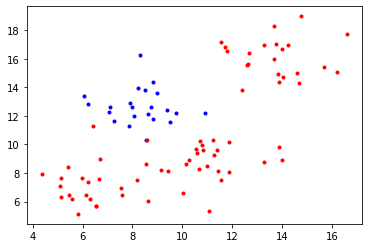

In [122]:
[X_train, y_train, X_test, y_test] = np.load("TP4.npy", allow_pickle=True) 

#Pixel peau
T_train = X_train[np.where(y_train==1),:] 
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 

#Pixel non peau 
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] )) 

plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show

## 2. Estimation des densités de probabilités

In [123]:
def norm2(x, m, cov): 
    a = np.dot(np.transpose((x-m)), np.linalg.inv(cov)) 
    a = np.dot(a, (x-m)) 
    p =1/(np.sqrt(2*np.pi*np.linalg.det(cov)))*np.exp(-0.5*a) 
    return p

In [124]:
def ddp_parzen(x, X, cov):
   somme = 0
   for i in range(len(X)):
        somme += norm2(x, X[i, :], cov)
   return somme/len(X)


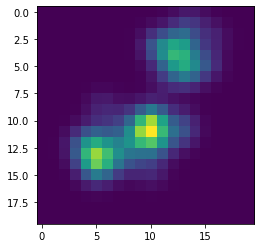

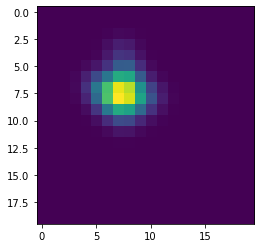

In [125]:
var = 1
cov = np.array([[var,0],[0,var]])
cb = np.arange(1,21)
cr = np.arange(1,21)
p_chair = np.zeros((20,20))
p_Nonchair = np.zeros((20,20))
for i in range(len(cb)):
    for j in range(len(cr)):
        x = [cb[j], cr[i]]
        p_chair[i][j] = ddp_parzen(x, T_train, cov)
        p_Nonchair[i][j] = ddp_parzen(x, F_train, cov)

plt.figure()
plt.imshow(np.flipud(p_chair))
plt.figure()
plt.imshow(np.flipud(p_Nonchair))

## 3. Classification Bayesienne

In [126]:
# Classifieur
pChaire = len(T_train)/len(X_train)
pNonchaire = len(F_train)/len(X_train)

px_chair = np.zeros(len(X_test))
px_nonchair = np.zeros(len(X_test))
for i in range(len(X_test)):
    px_chair[i] = ddp_parzen(X_test[i,:], T_train, cov)
    px_nonchair[i] = ddp_parzen(X_test[i,:], F_train, cov)


In [127]:
y_pre = np.zeros(len(X_test))
for i in range(len(X_test)):
    if px_chair[i]*pChaire > px_nonchair[i]*pNonchaire:
        y_pre[i] = 1
    else:
        y_pre[i] = 0

In [128]:
accuracy_score(y_test, y_pre)

0.9666666666666667

## 4. Estimation de la variance idéale

In [129]:
variance = np.arange(0.5,15,0.5)
score = []
for var in variance:
    cov = np.array([[var,0],[0,var]])
    px_chair = np.zeros(len(X_test))
    px_nonchair = np.zeros(len(X_test))
    for i in range(len(X_test)):
        px_chair[i] = ddp_parzen(X_test[i,:], T_train, cov)
        px_nonchair[i] = ddp_parzen(X_test[i,:], F_train, cov)

    y_pre = np.zeros(len(X_test))
    for i in range(len(X_test)):
        if px_chair[i]*pChaire >= px_nonchair[i]*pNonchaire:
            y_pre[i] = 1
        else:
            y_pre[i] = 0
    score.append(accuracy_score(y_test, y_pre)*100)

No handles with labels found to put in legend.


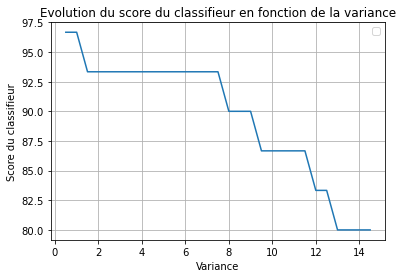

In [130]:
plt.plot(variance, score)
plt.xlabel("Variance")
plt.ylabel("Score du classifieur")
plt.title("Evolution du score du classifieur en fonction de la variance")
plt.grid()
plt.legend()
plt.show()